## Aditya Duggirala

**TODO**

## HW04 Code


You will complete the following notebook, as described in the PDF for Homework 04 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/spring2021/comp135).

#### Import required libraries

In [154]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss


from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

%matplotlib inline

#### Load data

In [155]:
# Load data
x_tr_N2 = np.loadtxt('data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('data_xor/y_test.csv', skiprows=1, delimiter=',')

assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

### Problem 1: MLP size [2] with activation ReLU and L-BFGS solver

In [156]:
# Problem 1: MLP size [2] with activation ReLU and default solver
n_runs = 17
classifier_list_lbfgs_relu = []

for random_state in range(1, n_runs):
    start_time_sec = time.time()
    mlp_relu = MLPClassifier( #With MLPClassifier, it shows up in the graph on problem 5, 
        #but not with MLPClassifierLBFGS. Not sure why this's happening
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200,
        tol=1e-6,
        random_state=random_state,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_relu.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        random_state, n_runs-1, elapsed_time_sec,
        len(mlp_relu.loss_curve_),
        'converged   ' if mlp_relu.n_iter_ < mlp_relu.max_iter else 'NOT converged',
        mlp_relu.loss_
    ))

    classifier_list_lbfgs_relu.append(mlp_relu)


finished run  1/16 after    0.5 sec | 200 iters | NOT converged | loss 0.508
finished run  2/16 after    0.3 sec | 200 iters | NOT converged | loss 0.389
finished run  3/16 after    0.3 sec | 200 iters | NOT converged | loss 0.752
finished run  4/16 after    0.2 sec | 200 iters | NOT converged | loss 0.371
finished run  5/16 after    0.2 sec | 200 iters | NOT converged | loss 0.193
finished run  6/16 after    0.2 sec | 200 iters | NOT converged | loss 0.334
finished run  7/16 after    0.2 sec | 200 iters | NOT converged | loss 0.548
finished run  8/16 after    0.2 sec | 200 iters | NOT converged | loss 0.402
finished run  9/16 after    0.3 sec | 200 iters | NOT converged | loss 0.461
finished run 10/16 after    0.2 sec | 200 iters | NOT converged | loss 0.637
finished run 11/16 after    0.2 sec | 200 iters | NOT converged | loss 0.499
finished run 12/16 after    0.2 sec | 200 iters | NOT converged | loss 0.299
finished run 13/16 after    0.2 sec | 200 iters | NOT converged | loss 0.611

#### 1 (a): Visualize probabilistic predictions in 2D feature space for ReLU + L-BFGS

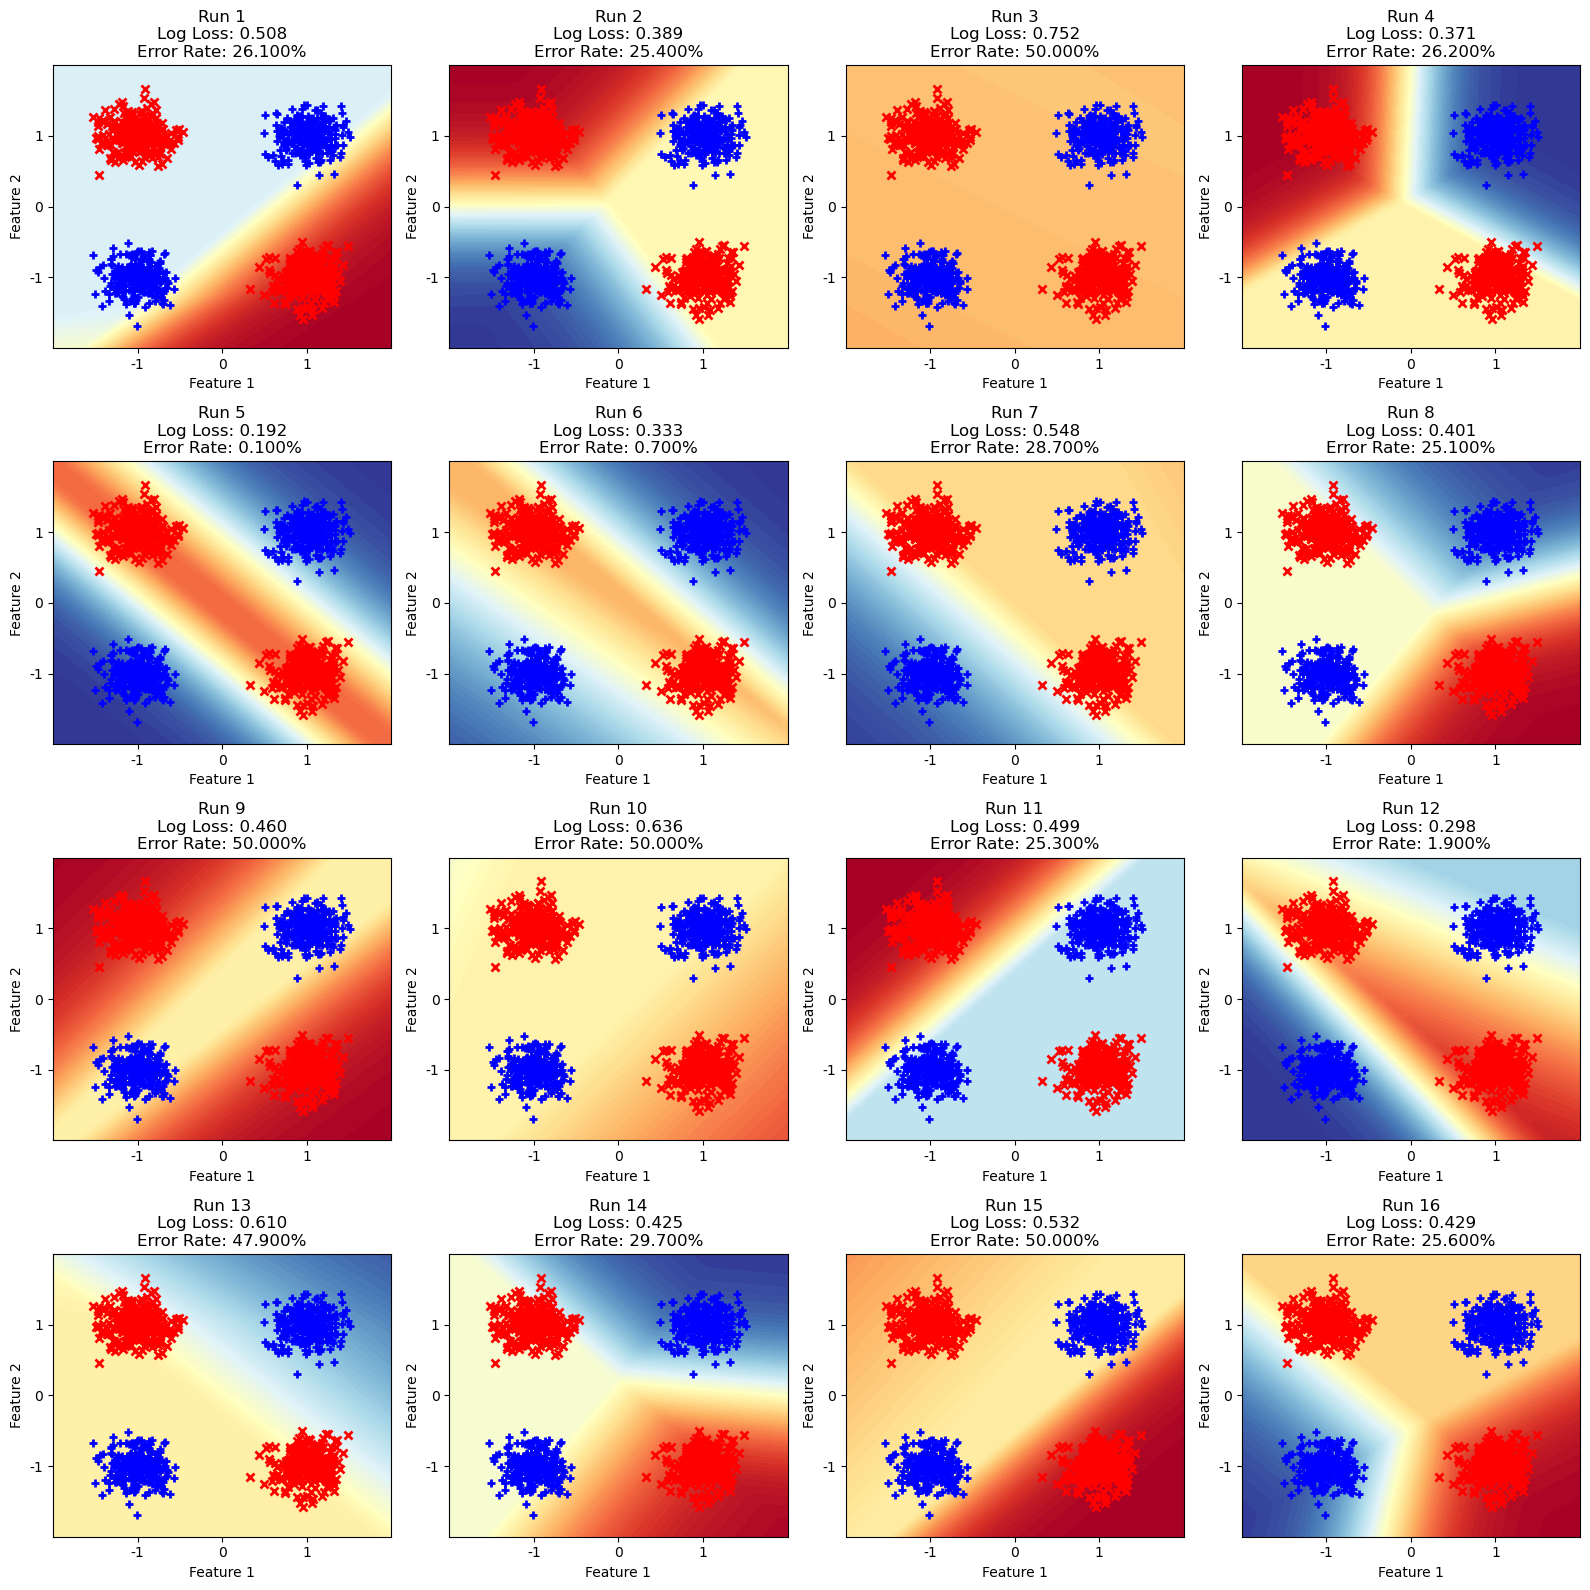

In [157]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Initialize a counter for the classifier index in the list
classifier_index = 0

for row in range(4):
    for col in range(4):
        if classifier_index < len(classifier_list_lbfgs_relu):
            classifier = classifier_list_lbfgs_relu[classifier_index]
            ax = ax_grid[row, col]

            # Visualize the probabilistic predictions for the classifier
            plot_pretty_probabilities_for_clf(
                classifier, x_tr_N2, y_tr_N, ax=ax)

           # Calculate log loss and error rate
            log_loss_value = log_loss(y_tr_N, classifier.predict_proba(x_tr_N2)[:, 1])
            error_rate = 1.0 - classifier.score(x_tr_N2, y_tr_N)

            # Set the title with log loss and error rate
            ax.set_title(f"Run {classifier_index + 1}\nLog Loss: {log_loss_value:.3f}\nError Rate: {error_rate:.3%}")
            ax.set_xlabel("Feature 1")
            ax.set_ylabel("Feature 2")

            classifier_index += 1

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()





#### 1 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 1/4 of the runs have an training error of zero. The others are having an error rate of 25% and a log loss rate of 0.347 or 0.447. They're converging very quickly, within the first iteration.

### Problem 2: MLP size [2] with activation Logistic and L-BFGS solver


In [158]:
# TODO edit this block to run 16 different random_state models with LOGISTIC activation

# Save each run's trained classifier object in a list

n_runs = 17
classifier_list_lbfgs_logistic = []  # Initialize a list to store classifier objects

for random_state in range(n_runs):
    start_time_sec = time.time()
    mlp_lbfgs_logistic = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200,
        tol=1e-6,
        random_state=random_state,  # Change the random state for each run
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs_logistic.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS (Logistic) run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        random_state, n_runs-1, elapsed_time_sec,
        mlp_lbfgs_logistic.n_iter_,
        'converged   ' if mlp_lbfgs_logistic.n_iter_ < mlp_lbfgs_logistic.max_iter else 'NOT converged',
        mlp_lbfgs_logistic.loss_))
    
    # Append the trained classifier to the list
    classifier_list_lbfgs_logistic.append(mlp_lbfgs_logistic)


finished LBFGS (Logistic) run  0/16 after    0.0 sec |   0 iters | converged    | loss 0.000
finished LBFGS (Logistic) run  1/16 after    0.1 sec |   0 iters | converged    | loss 0.347
finished LBFGS (Logistic) run  2/16 after    0.0 sec |   0 iters | converged    | loss 0.347
finished LBFGS (Logistic) run  3/16 after    0.0 sec |   0 iters | converged    | loss 0.000
finished LBFGS (Logistic) run  4/16 after    0.0 sec |   0 iters | converged    | loss 0.477
finished LBFGS (Logistic) run  5/16 after    0.0 sec |   0 iters | converged    | loss 0.000
finished LBFGS (Logistic) run  6/16 after    0.0 sec |   0 iters | converged    | loss 0.000
finished LBFGS (Logistic) run  7/16 after    0.0 sec |   0 iters | converged    | loss 0.477
finished LBFGS (Logistic) run  8/16 after    0.0 sec |   0 iters | converged    | loss 0.347
finished LBFGS (Logistic) run  9/16 after    0.1 sec |   0 iters | converged    | loss 0.347
finished LBFGS (Logistic) run 10/16 after    0.1 sec |   0 iters | con

#### 2 (a): Visualize probabilistic predictions in 2D feature space for Logistic Sigmoid + L-BFGS

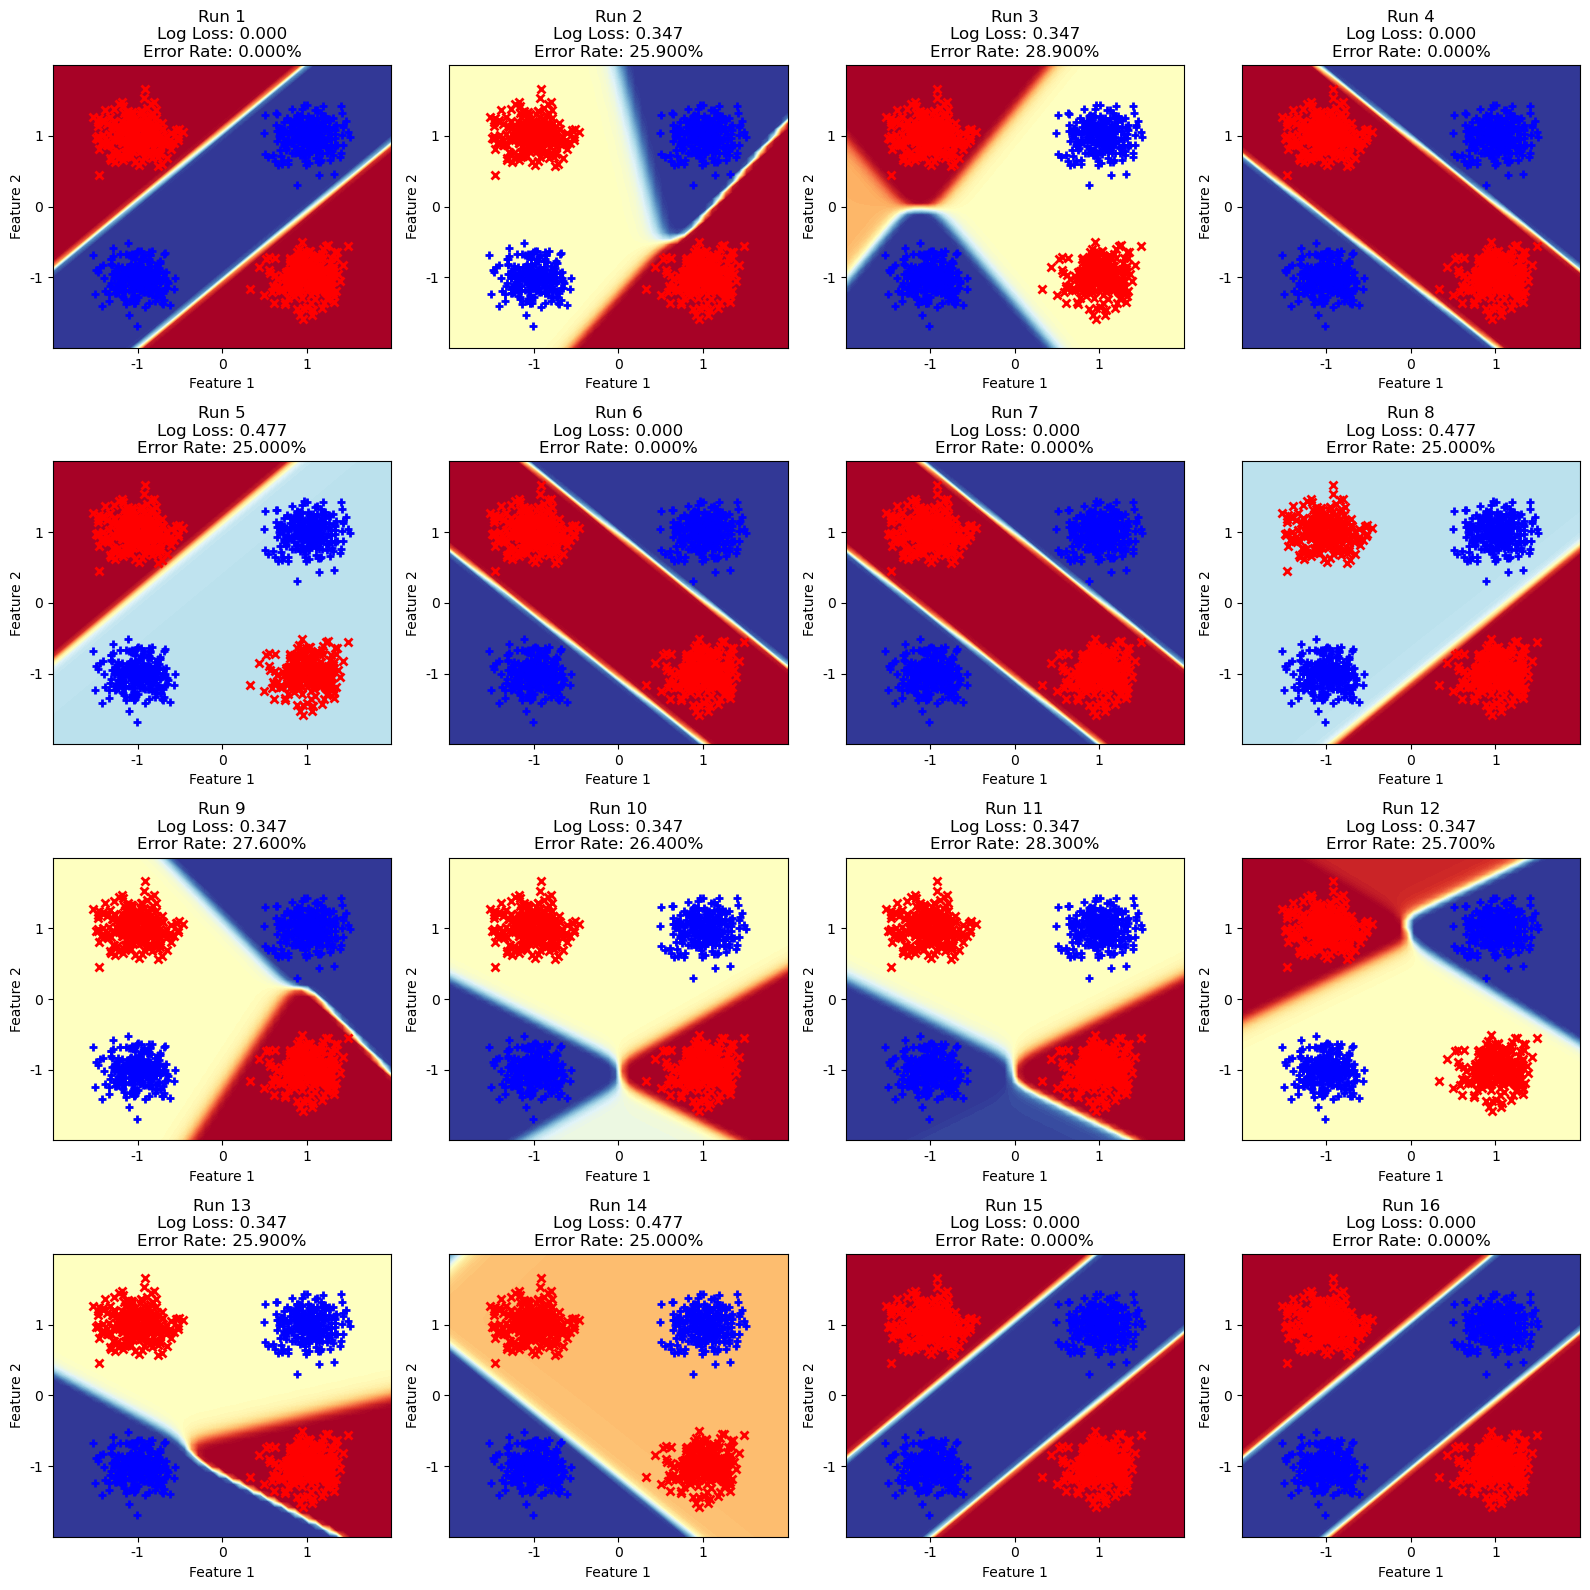

In [159]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Initialize a counter for the classifier index in the list
classifier_index = 0

for row in range(4):
    for col in range(4):
        if classifier_index < len(classifier_list_lbfgs_logistic):
            classifier = classifier_list_lbfgs_logistic[classifier_index]
            ax = ax_grid[row, col]

            # Visualize the probabilistic predictions for the classifier
            plot_pretty_probabilities_for_clf(
                classifier, x_tr_N2, y_tr_N, ax=ax)

            # Calculate log loss and error rate
            log_loss_value = log_loss(y_tr_N, classifier.predict_proba(x_tr_N2)[:, 1])
            error_rate = 1.0 - classifier.score(x_tr_N2, y_tr_N)

            # Set the title with log loss and error rate
            ax.set_title(f"Run {classifier_index + 1}\nLog Loss: {log_loss_value:.3f}\nError Rate: {error_rate:.3%}")
            ax.set_xlabel("Feature 1")
            ax.set_ylabel("Feature 2")

            classifier_index += 1

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


#### 2 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**: 3/8 runs reach a training error of 0. The others have an error rate of 25% to 28.9% and an error rate of 0.347 to 0.477. These are also converging within the first iteration.

### Problem 3: MLP size [2] with activation ReLU and SGD solver

In [160]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list 

n_runs = 17
classifier_list_sgd_relu = []  # Initialize a list to store classifier objects

for random_state in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd_relu = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=400,
        tol=1e-8,
        random_state=random_state,  # Change the random state for each run
        solver='sgd',
        batch_size=10,
        learning_rate='adaptive',
        learning_rate_init=0.1,
        momentum=0.0,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd_relu.fit(x_tr_N2, y_tr_N)
    mlp_sgd_relu.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD (ReLU) run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        random_state, n_runs-1, elapsed_time_sec,
        len(mlp_sgd_relu.loss_curve_),
        'converged    ' if mlp_sgd_relu.did_converge else 'NOT converged',
        mlp_sgd_relu.loss_))
    
    # Append the trained classifier to the list
    classifier_list_sgd_relu.append(mlp_sgd_relu)



finished SGD (ReLU) run  0/16 after    4.0 sec | 267 epochs | converged     | loss 0.347
finished SGD (ReLU) run  1/16 after    4.4 sec | 307 epochs | converged     | loss 0.478
finished SGD (ReLU) run  2/16 after    3.3 sec | 239 epochs | converged     | loss 0.347
finished SGD (ReLU) run  3/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.001
finished SGD (ReLU) run  4/16 after    3.9 sec | 275 epochs | converged     | loss 0.347
finished SGD (ReLU) run  5/16 after    5.4 sec | 400 epochs | NOT converged | loss 0.001
finished SGD (ReLU) run  6/16 after    5.4 sec | 400 epochs | NOT converged | loss 0.001
finished SGD (ReLU) run  7/16 after    3.8 sec | 273 epochs | converged     | loss 0.347
finished SGD (ReLU) run  8/16 after    3.0 sec | 219 epochs | converged     | loss 0.347
finished SGD (ReLU) run  9/16 after    5.5 sec | 400 epochs | NOT converged | loss 0.001
finished SGD (ReLU) run 10/16 after    5.3 sec | 394 epochs | converged     | loss 0.478
finished SGD (ReLU) r

#### 3 (a): Visualize probabilistic predictions in 2D feature space for ReLU + SGD

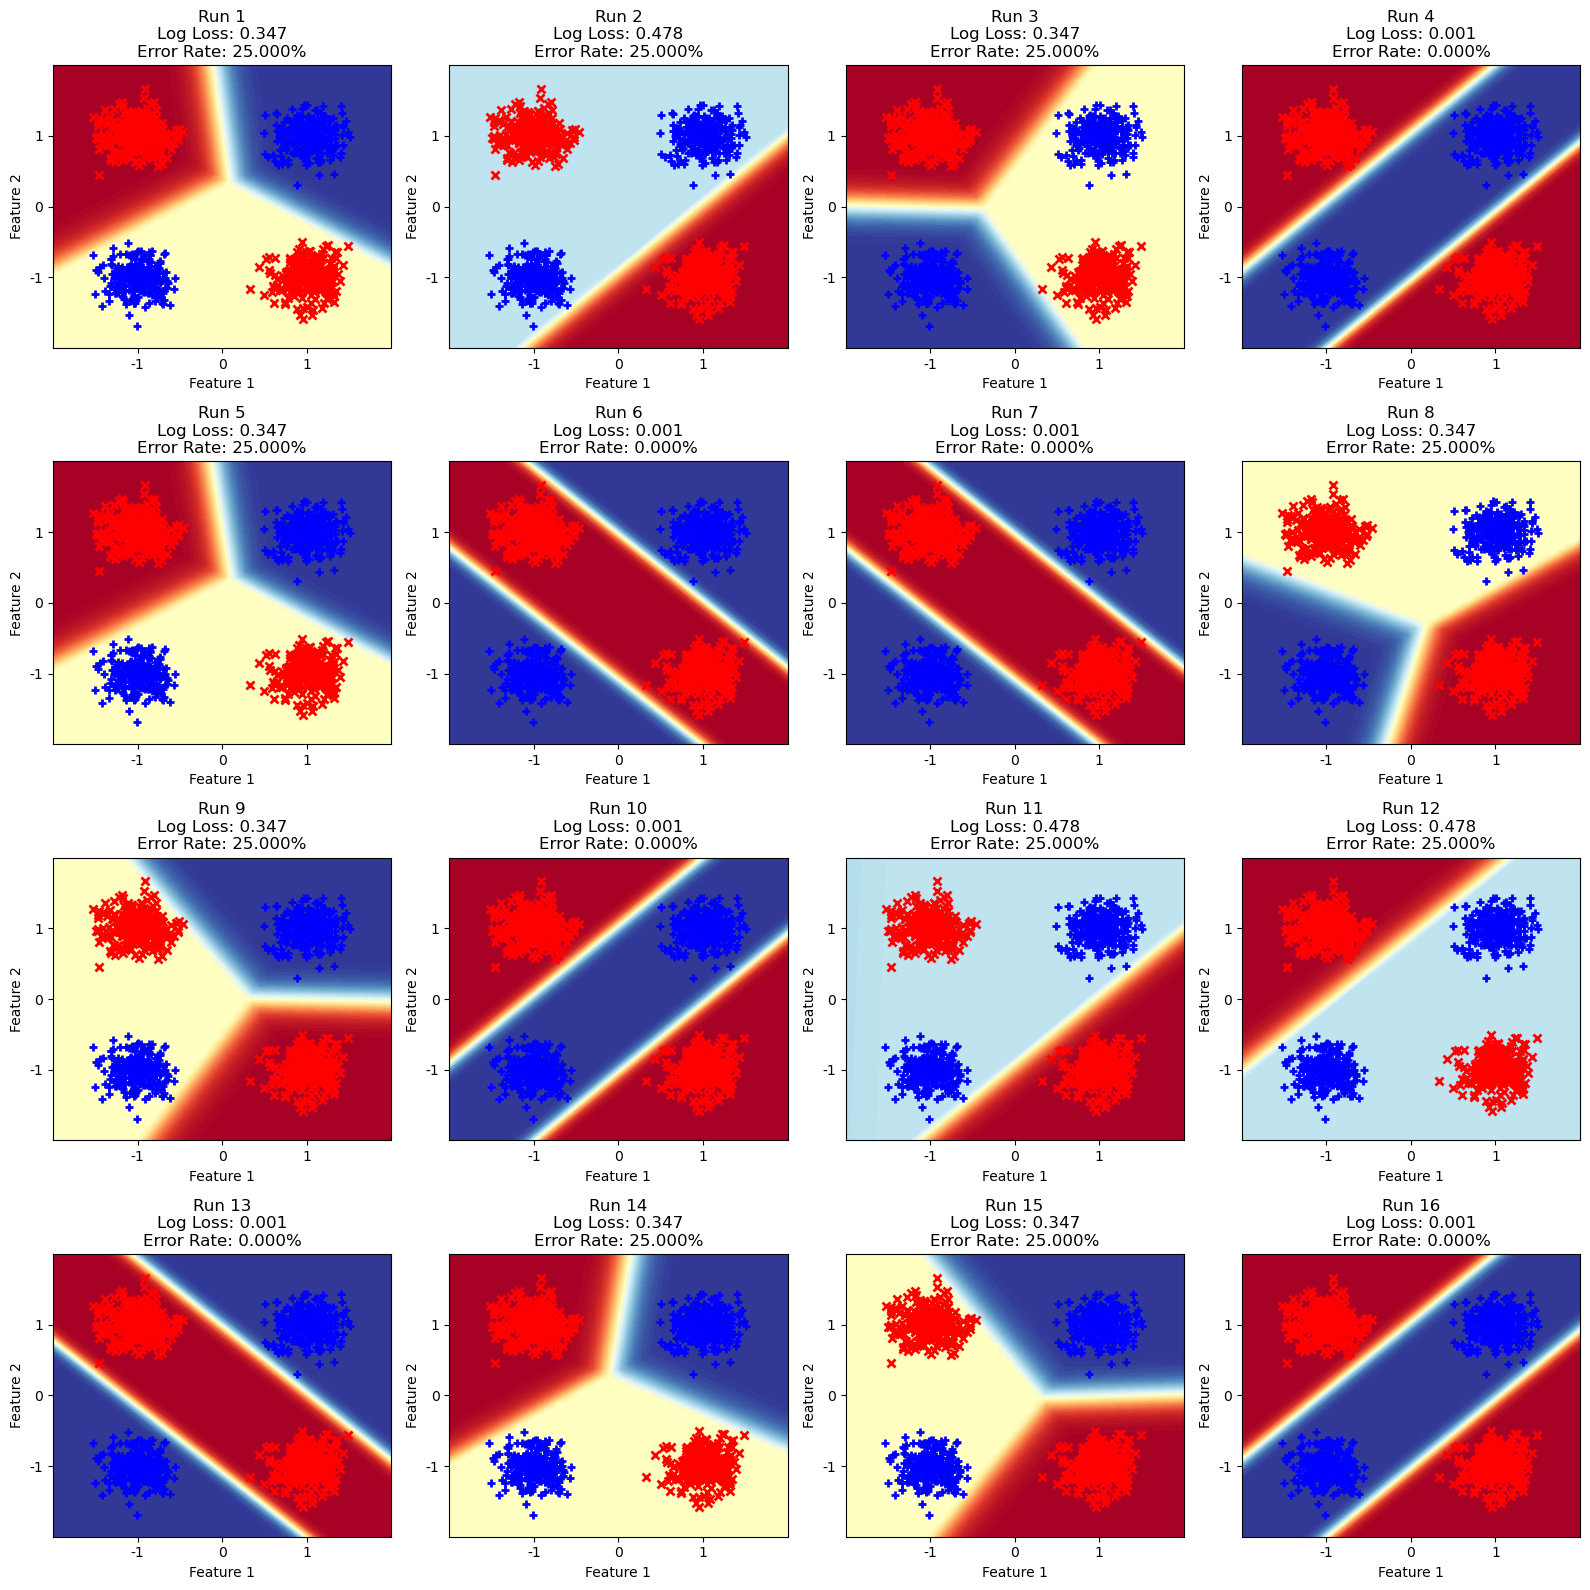

In [161]:
# TODO edit to plot all 16 runs from above

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Initialize a counter for the classifier index in the list
classifier_index = 0

for row in range(4):
    for col in range(4):
        if classifier_index < len(classifier_list_sgd_relu):
            classifier = classifier_list_sgd_relu[classifier_index]
            ax = ax_grid[row, col]

            # Visualize the probabilistic predictions for the classifier
            plot_pretty_probabilities_for_clf(
                classifier, x_tr_N2, y_tr_N, ax=ax)

            # Calculate log loss and error rate
            log_loss_value = log_loss(y_tr_N, classifier.predict_proba(x_tr_N2)[:, 1])
            error_rate = 1.0 - classifier.score(x_tr_N2, y_tr_N)

            # Set the title with log loss and error rate
            ax.set_title(f"Run {classifier_index + 1}\nLog Loss: {log_loss_value:.3f}\nError Rate: {error_rate:.3%}")
            ax.set_xlabel("Feature 1")
            ax.set_ylabel("Feature 2")
            classifier_index += 1

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


#### 3 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:  3/8 runs reach a training error of 0. The others have an error rate of 25%  and a loss rate of 0.347 to 0.478. These are also converging within a little over half 400 iterations to little below 350 iterations. So, it's slower than the two previous MLPs.

#### 3 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in part 1 (using the same ReLU activation function)?  Why, do you believe, these differences exist?

**Answer**: The most noticable difference betweeen the SGD with batch size 10 and L-BFGS is the convergence speed and the path taken to the minimum. This is because SGD has a small batch size and this results in weights being updated where as L-BFGS uses curves to make updates instead and converges faster.

These differences are because of the optimization algorithms.

### Problem 4: MLP size [2] with activation Logistic and SGD solver

In [162]:
# TODO edit to do 16 runs of SGD, like in previous step, but with LOGISTIC activation

n_runs = 17
classifier_list_sgd_logistic = []  # Initialize a list to store classifier objects

for random_state in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd_logistic = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=400,
        tol=1e-8,
        random_state=random_state,  # Change the random state for each run
        solver='sgd',
        batch_size=10,
        learning_rate='adaptive',
        learning_rate_init=0.1,
        momentum=0.0,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd_logistic.fit(x_tr_N2, y_tr_N)
    mlp_sgd_logistic.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD (Logistic) run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
        random_state, n_runs-1, elapsed_time_sec,
        len(mlp_sgd_logistic.loss_curve_),
        'converged    ' if mlp_sgd_logistic.did_converge else 'NOT converged',
        mlp_sgd_logistic.loss_))
    
    # Append the trained classifier to the list
    classifier_list_sgd_logistic.append(mlp_sgd_logistic)


finished SGD (Logistic) run  0/16 after    2.2 sec | 161 epochs | converged     | loss 0.693
finished SGD (Logistic) run  1/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD (Logistic) run  2/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.005
finished SGD (Logistic) run  3/16 after    2.9 sec | 215 epochs | converged     | loss 0.693
finished SGD (Logistic) run  4/16 after    5.2 sec | 400 epochs | NOT converged | loss 0.351
finished SGD (Logistic) run  5/16 after    5.6 sec | 400 epochs | NOT converged | loss 0.005
finished SGD (Logistic) run  6/16 after    5.7 sec | 400 epochs | NOT converged | loss 0.005
finished SGD (Logistic) run  7/16 after    5.4 sec | 400 epochs | NOT converged | loss 0.351
finished SGD (Logistic) run  8/16 after    5.4 sec | 400 epochs | NOT converged | loss 0.351
finished SGD (Logistic) run  9/16 after    5.3 sec | 400 epochs | NOT converged | loss 0.351
finished SGD (Logistic) run 10/16 after    1.7 sec | 124 epochs | conv

#### 4(a): Visualize probabilistic predictions in 2D feature space for Logistic + SGD

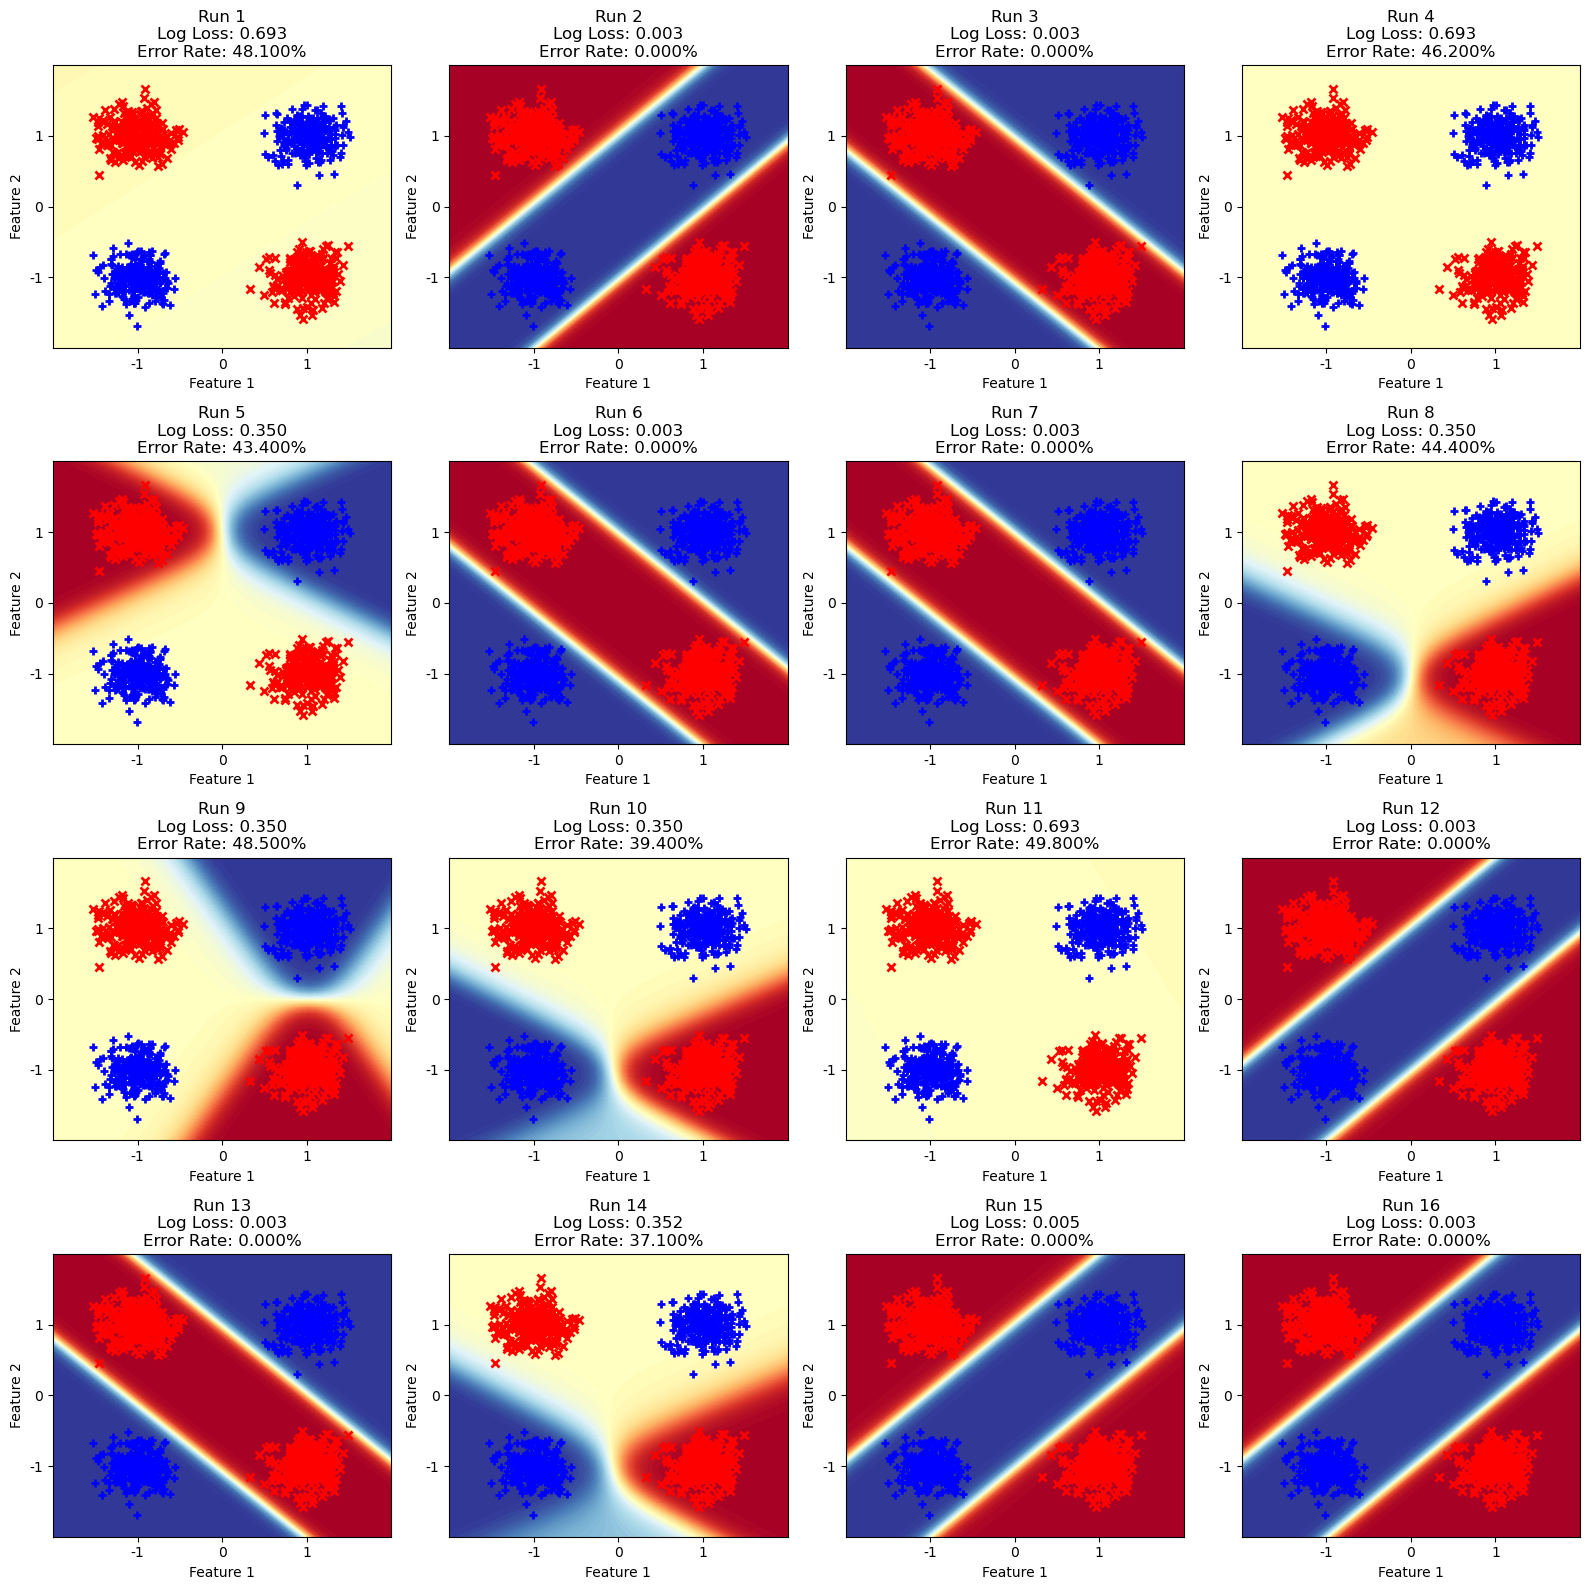

In [163]:
# TODO edit to plot all 16 runs from previous step

fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))

# Initialize a counter for the classifier index in the list
classifier_index = 0

for row in range(4):
    for col in range(4):
        if classifier_index < len(classifier_list_sgd_logistic):
            classifier = classifier_list_sgd_logistic[classifier_index]
            ax = ax_grid[row, col]

            # Visualize the probabilistic predictions for the classifier
            plot_pretty_probabilities_for_clf(
                classifier, x_tr_N2, y_tr_N, ax=ax)

            # Calculate log loss and error rate
            log_loss_value = log_loss(y_tr_N, classifier.predict_proba(x_tr_N2)[:, 1])
            error_rate = 1.0 - classifier.score(x_tr_N2, y_tr_N)

            # Set the title with log loss and error rate
            ax.set_title(f"Run {classifier_index + 1}\nLog Loss: {log_loss_value:.3f}\nError Rate: {error_rate:.3%}")
            ax.set_xlabel("Feature 1")
            ax.set_ylabel("Feature 2")

            classifier_index += 1

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


#### 4 (b): What fraction of runs reach 0 training error? What happens to the others? Describe how rapidly (or slowly) things seem to converge.

**Answer**:   1/2 runs reach a training error of 0. The others have an error rate of 37.1% to 49.8%  and a log loss rate of 0.350 to 0.693. These are converging within a little over a 100 iterations or they're not convering at all. So, it's faster than the previous MLP.

#### 4 (c): What is most noticeably different between SGD with batch size 10 and the previous L-BFGS runs in part 2 (using the same logistic activation function)?  Why, do you believe, these differences exist?

**Answer**: The most noticeable difference between SGD with batch size 10 and L-BFGS is the convergence speed and trajectory towards minimum. This is because Logistic activation functions are used for binary classification and that results in different optimization from ReLU.

The SGD also has more noisy trajectory but the model escapes the local minima, and the L-BFGS has a smoother and deterministic convergence trajectory.

### Problem 5: Comparing loss_curves

#### 5 (a): Plot loss_curves for each method in 2 x 2 subplot grid

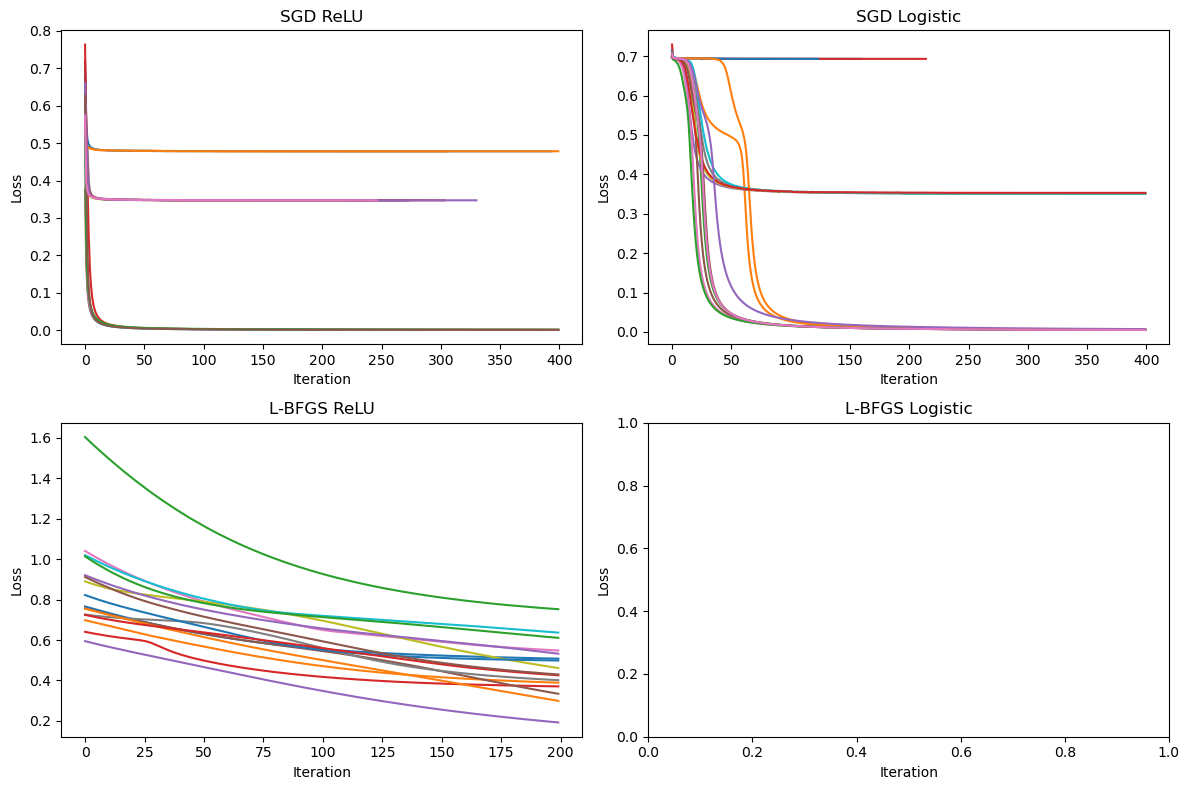

In [164]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# List of classifier lists for each method
classifier_lists = [classifier_list_sgd_relu, classifier_list_sgd_logistic, classifier_list_lbfgs_relu, classifier_list_lbfgs_logistic]
titles = ['SGD ReLU', 'SGD Logistic', 'L-BFGS ReLU', 'L-BFGS Logistic']

for i in range(4):
    ax = ax_grid[i // 2, i % 2]
    ax.set_title(titles[i])

    for classifier in classifier_lists[i]:
        if hasattr(classifier, 'loss_curve_') and np.asarray(classifier.loss_curve_).size > 0 and len(classifier.loss_curve_) > 1:
            ax.plot(classifier.loss_curve_, label=f"Run {classifier_lists[i].index(classifier) + 1}")

    ax.set_xlabel("Iteration")
    ax.set_ylabel("Loss")
    if ax.get_legend():
        ax.legend()

plt.tight_layout()
plt.show()


#### 5 (b): From this overview plot (plus your detailed plots from prior steps), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?  Which requires most iterations in general?



**Answer:** The ReLU activation function seems easier to optimize since the loss curves converge more quickly and consistently across runs when compared to the Logistic Sigmoid.

The Logisitic Sigmoid requires more iterations in general. This is because the loss curves have a slower convergence rate, meaning it takes more iterations for the optimization to reach a minimum.

#### 5 (c): Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**: I'm not convinced that it's always easier to optimize.

Three additional experimental comparisions would be looking at the final loss and convergence spped for different learning rates, different batch sizes, and weight initialization.